Reference
- "Numerical Methods for Engineers" Steven C. Chapra, and Raymond P. Canale

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)
import math

### Problem

Evaluate $e^5$ using two approaches,

$$e^{-x}=1-x+\frac{x^2}{2}-\frac{x^3}{3!}+...$$

$$e^{-x}=\frac{1}{e^x}=\frac{1}{1+x+\frac{x^2}{2}+\frac{x^3}{3!}+...}$$

and compare with the true value of $6.737947\times 10^{-3}$.
Use 20 terms to evaluate each series and compute true and approximate relative errors as terms are added

### Answer

1. define useful functions

In [2]:
def approach1(terms):
    """
    Evaluates e^(-5) using the first approach
    
    terms: the number of terms that will be used
    """
    x = 5
    result = 0
    for i in range(terms):
        if i%2 == 0:
            result += (x**i)/math.factorial(i)
        else:
            result -= (x**i)/math.factorial(i)
    return result

In [3]:
def approach2(terms):
    """
    Evaluates e^(-5) using the second approach
    
    terms: the number of terms that will be used
    """
    x = 5
    result = 0
    for i in range(terms):
            result += (x**i)/math.factorial(i)
    return 1/result

2. implement the calculation

In [4]:
# using dataframe to show the values
# only 6 digits are shown, the actual values won't be impacted though
# note that the relative errors are shown in percent

TRUE_VALUE = 0.006737947
df = pd.DataFrame()

df['Term'] = list(range(1, 21))
df['True'] = TRUE_VALUE
# for the first approach
df['Approach1'] = df['Term'].map(approach1)
# ture percent relative error
df['TrueError1(%)'] = (df['True'] - df['Approach1'])/df['True'] * 100
# approximate percent relative error
df['ApproxError1(%)'] = (df['Approach1'] - df['Approach1'].shift())/df['Approach1'] * 100
# for the second approach
df['Approach2'] = df['Term'].map(approach2)
# ture percent relative error
df['TrueError2(%)'] = (df['True'] - df['Approach2'])/df['True'] * 100
# approximate percent relative error
df['ApproxError2(%)'] = (df['Approach2'] - df['Approach2'].shift())/df['Approach2'] * 100

print('-------------------Result of e^-5------------------')
df

-------------------Result of e^-5------------------


,Term,True,Approach1,TrueError1(%),ApproxError1(%),Approach2,TrueError2(%),ApproxError2(%)
0,1,0.006738,1.000000,-14741.315908,NaN,1.000000,-14741.315908,NaN
1,2,0.006738,-4.000000,59465.263633,125.000000,0.166667,-2373.552651,-500.000000
2,3,0.006738,8.500000,-126051.185220,147.058824,0.054054,-702.233292,-208.333333
3,4,0.006738,-12.333333,183142.896202,168.918919,0.025424,-277.321591,-112.612613
4,5,0.006738,13.708333,-203349.705576,189.969605,0.015296,-127.018217,-66.207627
5,6,0.006738,-12.333333,183142.896202,211.148649,0.010939,-62.348032,-39.834289
6,7,0.006738,9.368056,-138934.271946,231.653076,0.008840,-31.202007,-23.738985
7,8,0.006738,-6.132937,91120.848159,252.749919,0.007775,-15.389720,-13.703376
8,9,0.006738,3.555184,-52663.601906,272.506889,0.007230,-7.306918,-7.532415
9,10,0.006738,-1.827105,27216.648130,294.580103,0.006959,-3.287438,-3.891547


3. plot

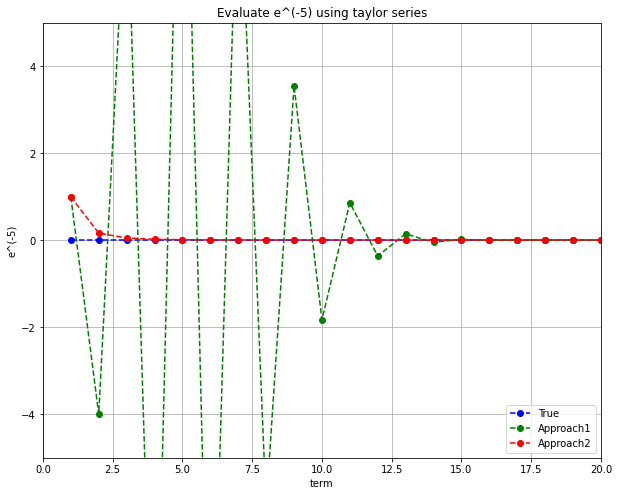

In [5]:
plt.figure(figsize = (10, 8))
plt.plot(df['Term'], df['True'], 'bo--', label='True')
plt.plot(df['Term'], df['Approach1'], 'go--', label='Approach1')
plt.plot(df['Term'], df['Approach2'], 'ro--', label='Approach2')
plt.xlim(0, 20)
plt.ylim(-5, 5)
plt.title('Evaluate e^(-5) using taylor series')
plt.xlabel('term')
plt.ylabel('e^(-5)')
plt.legend(loc='lower right')
plt.grid()

Therefore, the second approach gives a better approximation